In [ ]:
import numpy as np
import pandas as pd
pd.set_option("display.precision", 2)

In [ ]:
df = pd.read_csv(filepath_or_buffer='telecom_churn.csv')

Let's look at this data

In [ ]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [ ]:
df['Churn'] = df['Churn'].astype('int64') #so we can get a description 

In [ ]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
count,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00
mean,101.06,437.18,8.10,179.78,100.44,30.56,200.98,100.11,17.08,200.87,100.11,9.04,10.24,4.48,2.76,1.56,0.14
std,39.82,42.37,13.69,54.47,20.07,9.26,50.71,19.92,4.31,50.57,19.57,2.28,2.79,2.46,0.75,1.32,0.35
min,1.00,408.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.20,33.00,1.04,0.00,0.00,0.00,0.00,0.00
25%,74.00,408.00,0.00,143.70,87.00,24.43,166.60,87.00,14.16,167.00,87.00,7.52,8.50,3.00,2.30,1.00,0.00
50%,101.00,415.00,0.00,179.40,101.00,30.50,201.40,100.00,17.12,201.20,100.00,9.05,10.30,4.00,2.78,1.00,0.00
75%,127.00,510.00,20.00,216.40,114.00,36.79,235.30,114.00,20.00,235.30,113.00,10.59,12.10,6.00,3.27,2.00,0.00
max,243.00,510.00,51.00,350.80,165.00,59.64,363.70,170.00,30.91,395.00,175.00,17.77,20.00,20.00,5.40,9.00,1.00


In [ ]:
df['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

How much time (on average) do churned users spend on the phone during daytime?

In [ ]:
df[df['Churn'] == 1]['Total day minutes'].mean()

206.91407867494814

What is the maximum length of international calls among loyal users (Churn == 0) who do not have an international plan?

In [ ]:
df[(df['International plan'] == 'No') & (df['Churn'] == 0)]['Total intl minutes'].max()

18.9

We need to select all states starting with W

In [ ]:
df[df['State'].apply(lambda state: state[0] == 'W')].head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
9,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0
26,WY,57,408,No,Yes,39,213.0,115,36.21,191.1,112,16.24,182.7,115,8.22,9.5,3,2.57,0,0
44,WI,64,510,No,No,0,154.0,67,26.18,225.8,118,19.19,265.3,86,11.94,3.5,3,0.95,1,0
49,WY,97,415,No,Yes,24,133.2,135,22.64,217.2,58,18.46,70.6,79,3.18,11.0,3,2.97,1,0
54,WY,87,415,No,No,0,151.0,83,25.67,219.7,116,18.67,203.9,127,9.18,9.7,3,2.62,5,1


Using map we can replace values in column

In [ ]:
d = {'No' : False, 'Yes' : True}
df['International plan'] = df['International plan'].map(d)
#or with the replace:
df = df.replace({'Voice mail plan' : d})

df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Suppose we want to group the data according to the values of the Churn variable and display statistics of three columns in each group

In [ ]:
df.groupby(['Churn'])[['Total day minutes', 'Total eve minutes', 'Total night minutes']].describe(percentiles=[])

Total day minutes                      ... Total night minutes                     
                  count    mean    std  min  ...                 std   min     50%    max
Churn                                        ...                                         
False            2850.0  175.18  50.18  0.0  ...               51.11  23.2  200.25  395.0
True              483.0  206.91  69.00  0.0  ...               47.13  47.4  204.80  354.9

[2 rows x 18 columns]

Suppose we want to see how the observations in our sample are distributed in the context of two variables - Churn and International plan

In [ ]:
pd.crosstab(df['Churn'], df['International plan'], normalize=True)

International plan,False,True
Churn,,
False,0.8,0.06
True,0.1,0.04


We can see that most of the users are loyal and do not use additional services.

Let's take a look at the average number of day, evening, and night calls by area code:

In [ ]:
df.pivot_table(['Total day calls', 'Total eve calls', 'Total night calls'], ['Area code'], aggfunc='mean')

,Total day calls,Total eve calls,Total night calls
Area code,,,
408,100.50,99.79,99.04
415,100.58,100.50,100.40
510,100.10,99.67,100.60


Suppose we want to calculate the total number of calls for all users, let's create the total_calls Series and paste it into the DataFrame:

In [ ]:
total_calls = df['Total day calls'] + df['Total eve calls'] + df['Total night calls'] + df['Total intl calls']
df.insert(loc=len(df.columns), column='Total calls', value=total_calls) 

df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total calls
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,303
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,332
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,333
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,255
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,359


Let's see how churn rate is related to the International plan feature

In [ ]:
pd.crosstab(df['Churn'], df['International plan'], margins=True)

International plan,No,Yes,All
Churn,,,
False,2664,186,2850
True,346,137,483
All,3010,323,3333


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


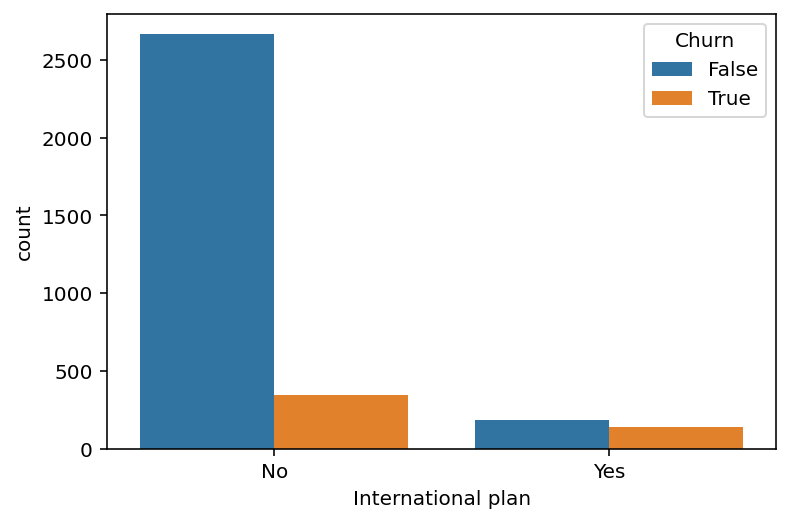

In [ ]:
sns.countplot(x='International plan', hue='Churn', data=df);

We see that with International Plan the churn rate is much higher. Perhaps large and poorly controlled expenses with international calls are very conflict-prone and lead to dissatisfaction among the telecom operator's customers.

Next, let's look at another important feature – Customer service calls. Let's also make a summary table and a picture.

In [ ]:
pd.crosstab(df['Churn'], df['Customer service calls'], margins=True)

Customer service calls,0,1,2,3,4,5,6,7,8,9,All
Churn,,,,,,,,,,,
False,605,1059,672,385,90,26,8,4,1,0,2850
True,92,122,87,44,76,40,14,5,1,2,483
All,697,1181,759,429,166,66,22,9,2,2,3333


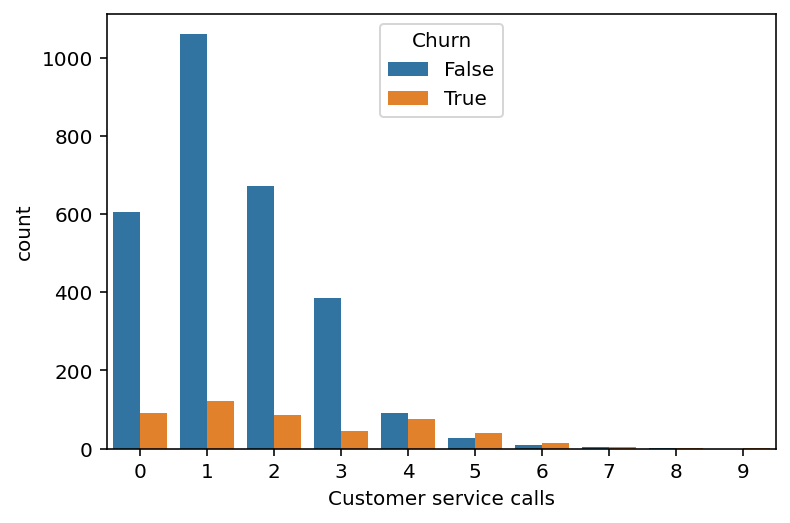

In [ ]:
sns.countplot(x='Customer service calls', hue='Churn', data=df)

We can see that Churn is sharply increases from 4 calls and above

In [ ]:
df['Many service calls'] = (df['Customer service calls'] > 3).astype('int')
pd.crosstab(df['Many service calls'], df['Churn'], margins=True)

Churn,False,True,All
Many service calls,,,
0,2721,345,3066
1,129,138,267
All,2850,483,3333


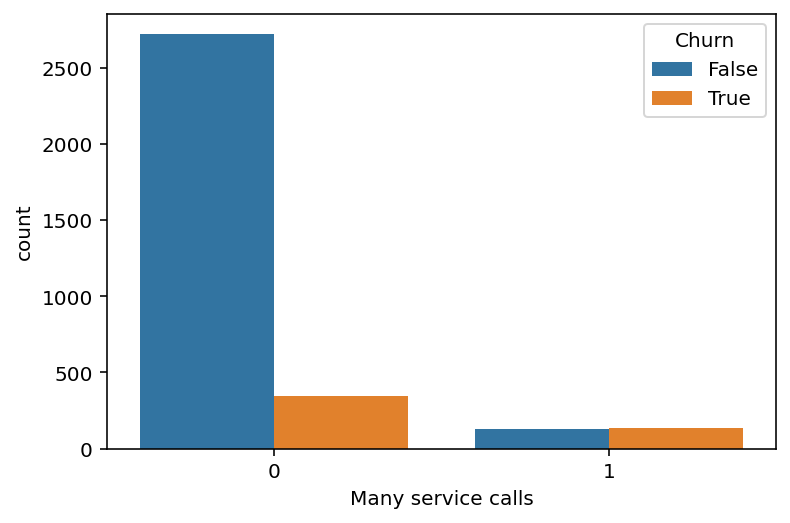

In [ ]:
sns.countplot(x='Many service calls', hue='Churn', data=df);

Let's construct another contingency table that relates Churn with both International plan and Many service calls.

In [ ]:
dict = {'Yes' : True, 'No' : False}
df['International plan'] = df['International plan'].map(dict)

In [ ]:
pd.crosstab((df['Customer service calls'] & df['International plan']), df['Churn'], normalize=True)

Churn,False,True
row_0,,
False,0.83,0.13
True,0.03,0.02


With the help of a simple forecast that can be expressed by the following formula: "International plan = True & Customer Service calls > 3 => Churn = 1, else Churn = 0", we can expect a guessing rate of 85.8%